### Om deze code te runnen moet je altijd vanaf boven beginnen met uitvoeren. Dus je klikt dan vanuit het blokje hieronder steeds op uitvoeren.

In [1]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import lightkurve as lk

In [2]:
#De TIC id voor exoplanet L 168-9 b

TIC = 'TIC 234994474'

In [3]:
#In dit gedeelte wordt de geselecteerde data van de exoplaneet L 168-9 b opgevraagd en getoont
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[1:3]

available_data_select

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 28,2020,SPOC,20,234994474,0.0
1,TESS Sector 28,2020,SPOC,120,234994474,0.0


<IPython.core.display.Javascript object>


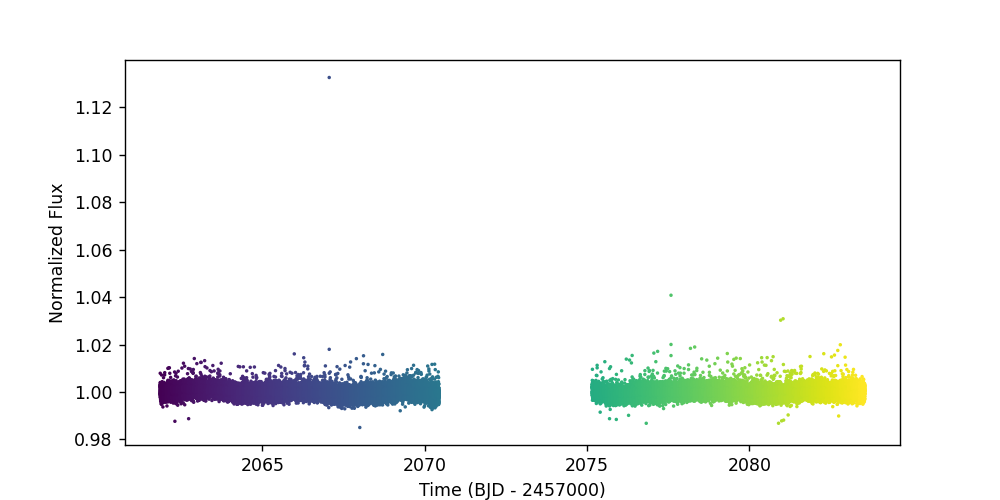

In [4]:
#Hierin wordt de data van hierboven in een grafiek geplot. 
'''
In de grafiek zie je een lightcurve, deze laat zien hoe het light van de ster HIP 65 A soms kort geblokeert wordt door exoplaneet HIP 65 A b. 
Dit kan je zien in afwijkende stippelpatronen naar beneden die steeds terug komen.
'''
#De kleur van de grafiek geeft aan hoe oud de gegevens zijn, de donkerste kleuren zijn de oudste gegevens.
lc_collection = available_data_select.download_all().stitch()

fig, ax = plt.subplots(figsize=(8, 4))

plt.scatter(lc_collection.time.value, lc_collection.flux.value, c = lc_collection.time.value, s = 1)

plt.xlabel("Time (BJD - 2457000)")
plt.ylabel("Normalized Flux")
plt.show()

In [5]:
#Met dit stukje kan ik één periode (de omlooptijd) plotten van de lightcurve.
#De periode kan ik bereken (zie de andere code voor de omlooptijd) of opzoeken.
#T0 kan ik berekenen door de epoch van L 168-9 b (opgezocht op ExoFOP) - 2457000.0 te doen.
#Als laatste ga ik in dit stukje code de lightcurve 'binnen', dit houdt in dat ik voor elke 5 minuten aan gegevens het gemiddelde wil weten en hier een nieuwe lightcurve van wil krijgen.

period  = 1.40150
t0 = 1340.04781 

lc_phased = lc_collection.fold(period = period, epoch_time = t0)

lc_phased_binned = lc_phased.bin(5/24/60)

<IPython.core.display.Javascript object>


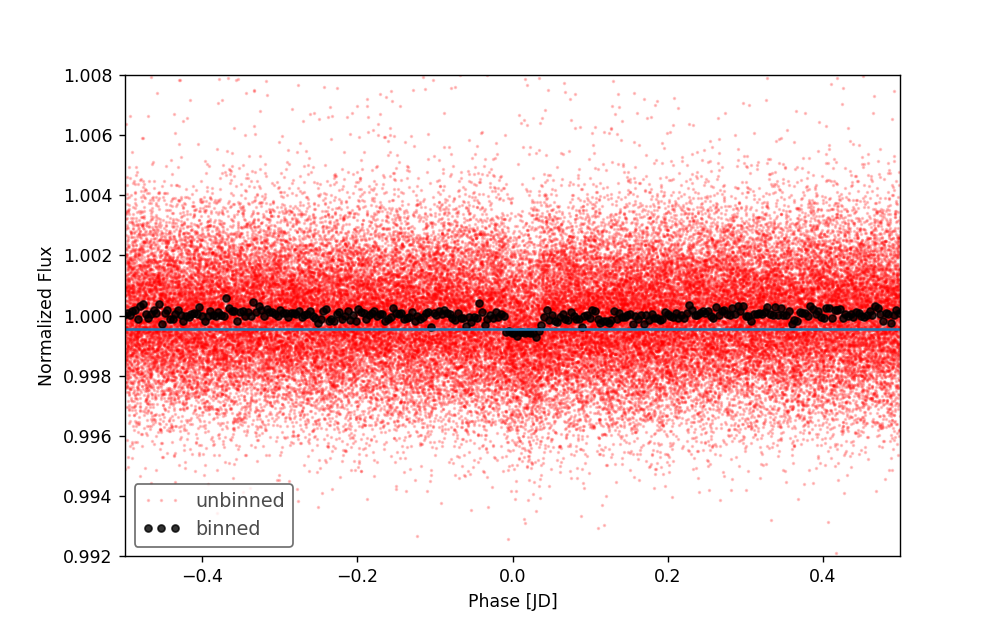

(0.992, 1.008)

In [6]:
#Hier ga ik de normale lightcurve en de binned lightcurve overelkaar heen plotten
#Ook voeg ik een lijn toe die moet gaan helpen om de transit depth te berekenen, deze lijn gaat door de laagste zwarte stippen.

fig, ax = plt.subplots(figsize = (8,5))

lc_phased.plot(ax = ax, marker = '.', linewidth = 0, color = 'red', alpha = 0.2, markersize = 2, label = 'unbinned')
lc_phased_binned.plot(ax = ax, marker = 'o', linewidth = 0, color = 'k', alpha = 0.8, markersize = 4, label = 'binned')


plt.axhline(0.99954)

plt.xlim(-0.5,0.5)
plt.ylim(0.992, 1.008)


In [7]:
from astropy import units as u
import numpy as np

In [8]:
'''
Ik bereken in dit stukje code de transit depth door 1 - het getal van de blauwe lijn te doen.
En ik bereken ook de radius van de ster(L 168-9) waar de exoplaneet L 168-9 b omheen draait.
'''

transit_depth = 1 - 0.99954 
 
#Ik heb de massa van de ster omgezocht
#Aangezien dit gemeten in de radius van onze zon moeten we het keer de radius unit van onze zon doen.
R_star = 0.597007 * u.Rsun 

In [9]:
#Hieronder bereken ik de massa van de exoplaneet (in solar radius)
r_pl_solar_radius = np.sqrt(transit_depth) * R_star

r_pl_solar_radius

<Quantity 0.01280437 solRad>

In [10]:
#Om het duidelijker te maken groot de radius is zetten we het om naar hoeveel aardes er in de exoplaneets radius passen.
r_pl_earth_radius = r_pl_solar_radius.to(u.Rearth)

r_pl_earth_radius

<Quantity 1.39665461 earthRad>

In [12]:
# Deze laatste stukkjes code zijn er om een mooi antwoord te krijgen op de vraag 'hoe groot is de radius van de exoplaneet'
def planet_radius(intransit_flux, stellar_radius):
    
        ''' 
        intransit_flux: de waarde van de horizontale lijn in de laatste grafiek
        stellar_radius: de radius van de ster van de exoplaneet 
        '''
        transit_depth = 1 - intransit_flux 
        R_star = stellar_radius* u.Rsun 
        r_pl_solar_radius = np.sqrt(transit_depth) * R_star
        r_pl_Earth = r_pl_solar_radius.to(u.Rearth).value
        print ("Radius of the planet: {} Earth radii".format(round(r_pl_Earth, 2)))
        

In [13]:
planet_radius(0.99954, 0.597007)

Radius of the planet: 1.4 Earth radii
